### 1. Radioactive decay chain
${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

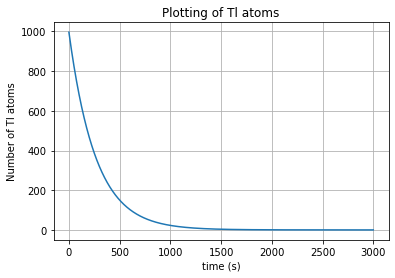

<Figure size 432x288 with 0 Axes>

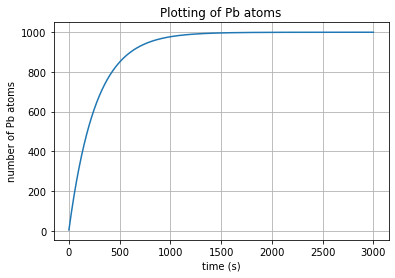

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
N=1000
t=1
start=1
tau=3.052*60
i=0
list_Tl=[]
list_Pb=[]


while(t<3000 or start==1):
    start=0
    Tl=N*(1-2**(-t/tau)) 
    list_Tl.append(1000-Tl)
    list_Pb.append(Tl)
    i=i+1
    t=t+1
    
    
t = np.arange(0,i,1)
fig, ax = plt.subplots()
ax.set(xlabel='time (s)', ylabel='Number of Tl atoms',
       title='Plotting of Tl atoms')

ax.plot(t,list_Tl)
ax.grid()
plt.figure()
fig, ax1 = plt.subplots()
ax1.set(xlabel='time (s)', ylabel='number of Pb atoms',
       title='Plotting of Pb atoms')

ax1.plot(t,list_Pb)
ax1.grid()
plt.show()

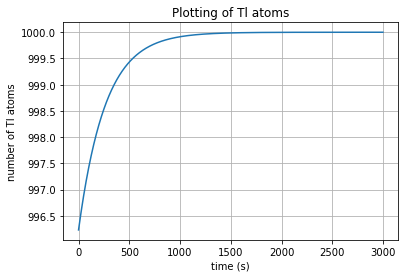

<Figure size 432x288 with 0 Axes>

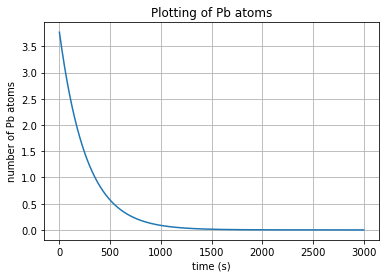

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
N=1000
t=1
start=1
tau=3.052*60
i=0
list_Tl=[]
list_Pb=[]
while(t<3000 or start==1):
    start=0
    Tl=N*(2**(-t/tau)*(np.log(2)/tau))
    list_Tl.append(1000-Tl)
    list_Pb.append(Tl)
    i=i+1
    t=t+1
t = np.arange(0,i,1)
fig, ax = plt.subplots()
ax.set(xlabel='time (s)', ylabel='number of Tl atoms',
       title='Plotting of Tl atoms')
ax.plot(t,list_Tl)
ax.grid()
plt.figure()
fig, ax1 = plt.subplots()
ax1.set(xlabel='time (s)', ylabel='number of Pb atoms',
       title='Plotting of Pb atoms')
ax1.plot(t,list_Pb)
ax1.grid()
plt.show()

### 2. Rutherford Scattering
The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$
where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [10]:
import numpy as np
import math
Z =79
h=1.055*(10**(-34))
m=9.109*(10**(-31))
k=8.988*(10**(9))
e=1.602*(10**(-19))
E=7.7*1e6*e
e0= 8.8541878128*(10**(-12))
a0=(h**2)/(m*k*(e**2))
N=1000000
x = np.random.normal(0,a0/100,N)
y = np.random.normal(0,a0/100,N)
c = np.sqrt(np.power(x,2)+np.power(y,2))
theta=2*np.arctan((Z*e**2)/(2*math.pi*E*e0)/c)
print ("Percent of particles whose scattering angle is greater than θ > π/2 : ",(float(len(theta[theta>np.pi/2]))/N)*100,"%")


def rutherford_scatter(b, Z=79, E=7.7e6):
    e_  = 1.60217662e-19 #[C]
    e0_ = 8.854e-12      #[F/m]
    return 2 * np.arctan((Z * e_) / (2 * np.pi * e0_ * E * b))

a0_    = 5.29e-11 #[m]
sigma_ = a0/100
cov_   = [[sigma_,0],[0,sigma_]]
mean_  = [0,0]

N = 1000000
x = np.random.normal(0,sigma_,N)
y = np.random.normal(0,sigma_,N)

theta = rutherford_scatter(np.sqrt(x**2 +y**2))

N_back = len(theta[theta>np.pi/2])

Percent of particles whose scattering angle is greater than θ > π/2 :  0.1583 %


### 3. Monte Carlo integration: hit/miss vs mean value method
Consider the function

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$
* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [11]:
import math
def f(x):
    return (math.sin(1/(x*(2-x))))**2
N=10000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
result=2*count/N
error = 0.6745*math.sqrt(result*(2-result)/N)
print("Integral :",result,"Error :",error)

Integral : 1.4422 Error : 0.006049701612119312


In [12]:
import math
def f(x):
    return (math.sin(1/(x*(2-x))))**2
def integral(starting,ending,N):
    width=(float(ending)-float(starting))/N
    Sum=0
    for i in range(N):
        height=f(starting+i*width)
        area=height*width
        Sum+=area
    return Sum
result=integral(0.0001,2,10000)
error = 0.6745*math.sqrt(result*(2-result)/N)
print("Integral :",result,"Error :",error)

Integral : 1.4510508516883263 Error : 0.006019900707352529


### 4. Monte Carlo integration in high dimension
* Start of by computing the area of a circle of unit radius, by integrating the function
$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 &amp; x^2+y^2\le 1 \\
      0 &amp; {\rm elsewhere}
\end{array} 
\right.
$$
* Generalize the result for a 10D sphere

In [13]:
import math
def f(x):
    return math.sqrt(1-(x**2))
def integral(starting,ending,N):
    width=(float(ending)-float(starting))/N
    Sum=0
    for i in range(N):
        height=f(starting+i*width)
        area=height*width
        Sum+=area
    return 2*Sum
result=integral(-1,1,10000)
error = 0.6745*math.sqrt(result*(4-result)/N)
print("Integral :",result,"Error :",error)

Integral : 3.141589327430582 Error : 0.011076542411393666


In [17]:
def f(z):
    y=sum(x**2 for x in z)
    if y <=1: return 1
    else: return 0
N = 1000000
count=0
D=10
for i in range(N):
    x1=np.random.uniform(-1,1,D)
    if f(x1)==1: count+=1
volume=2**D
result=volume*(float(count)/float(N))
error = 0.6745*np.sqrt(result*(volume-result)/N)
print("Integral :",result,"Error :",error)

Integral : 2.538496 Error : 0.034346397963735086


### 5. Monte Carlo integration with importance sampling
Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$
using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [22]:
import numpy as np
N = 10000
def function(x):
    return x**(-1/2)/(np.exp(x) + 1) 
def stp(x):
    return x*x/5
def w_function(x):
    if (x > 0):
        return 1/np.sqrt(x)
random=np.random.uniform(0,2,N)
dividing = np.array([function(i) for i in stp(random)])
divider = np.array([w_function(i) for i in stp(random)])
result = 2/N * np.sum(dividing/divider)
print('Integral:',result)

Integral: 0.8694780521659218
